# 이미지 학습

In [ ]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

< 이미지 시각화하는 함수 생성>

In [ ]:
def imshow(img):
    img = img /2 + 0.5 # unnormalize
    np_img = img.numpy()
    # plt.imshow(np_img)
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)

In [ ]:
import os

os.listdir('./img_data/img')

['cat', 'dog']

In [ ]:
trans = transforms.Compose([transforms.Resize((32,32)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root = "./img_data/img",
                                           transform = trans)

#### __getitem__ 메소드로 데이터 하나를 가져와 본다.

In [ ]:
trainset[1]

(tensor([[[ 0.3725,  0.3804,  0.3882,  ...,  0.2863,  0.2627,  0.2157],
          [ 0.3804,  0.3882,  0.3961,  ...,  0.3647,  0.3176,  0.2863],
          [ 0.3882,  0.4039,  0.4118,  ...,  0.3961,  0.3725,  0.3569],
          ...,
          [ 0.8667,  0.8745,  0.8745,  ...,  0.4824,  0.1686,  0.7255],
          [ 0.8667,  0.8745,  0.8745,  ...,  0.5294,  0.6157,  0.8196],
          [ 0.8745,  0.8824,  0.8745,  ...,  0.4588,  0.7882,  0.8353]],
 
         [[ 0.2392,  0.2471,  0.2549,  ...,  0.1294,  0.0980,  0.0588],
          [ 0.2392,  0.2471,  0.2549,  ...,  0.2157,  0.1843,  0.1451],
          [ 0.2549,  0.2627,  0.2784,  ...,  0.2471,  0.2314,  0.2235],
          ...,
          [ 0.8353,  0.8431,  0.8431,  ...,  0.4275,  0.0902,  0.6706],
          [ 0.8353,  0.8431,  0.8431,  ...,  0.4510,  0.5608,  0.7804],
          [ 0.8510,  0.8588,  0.8588,  ...,  0.4118,  0.7647,  0.8196]],
 
         [[ 0.0980,  0.1059,  0.1137,  ..., -0.0902, -0.1294, -0.1686],
          [ 0.1216,  0.1294,

In [ ]:
len(trainset)

10

In [ ]:
trainloader = DataLoader(trainset,
                        batch_size = 2,
                        shuffle = False,
                        num_workers = 4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
classes = trainset.classes
classes

['cat', 'dog']

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


tensor([0, 0])


torch.Size([2, 3, 32, 32])
(3, 36, 70)
(36, 70, 3)
torch.Size([2, 3, 32, 32])
torch.Size([3, 36, 70])
  cat   cat 


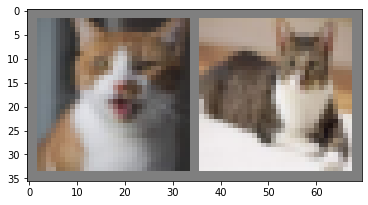

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=2))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(2)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # kernel=5, paddig=0. stride=1. 32-5+1=28
        self.pool = nn.MaxPool2d(2, 2)  # 14
        self.conv2 = nn.Conv2d(6, 16, 5) # kernel=5, paddig=0. stride=1. 14-5+1=10 => max pooling 후 5X5
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(5):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[1,     1] loss: 0.000
[1,     2] loss: 0.000
[1,     3] loss: 0.000
[1,     4] loss: 0.000
[1,     5] loss: 0.000
[2,     1] loss: 0.000
[2,     2] loss: 0.000
[2,     3] loss: 0.000
[2,     4] loss: 0.000
[2,     5] loss: 0.000
[3,     1] loss: 0.000
[3,     2] loss: 0.000
[3,     3] loss: 0.000
[3,     4] loss: 0.000
[3,     5] loss: 0.000
[4,     1] loss: 0.000
[4,     2] loss: 0.000
[4,     3] loss: 0.000
[4,     4] loss: 0.000
[4,     5] loss: 0.000
[5,     1] loss: 0.000
[5,     2] loss: 0.000
[5,     3] loss: 0.000
[5,     4] loss: 0.000
[5,     5] loss: 0.000
Finished Training


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


(3, 36, 70)
(36, 70, 3)
GroundTruth:    cat   cat


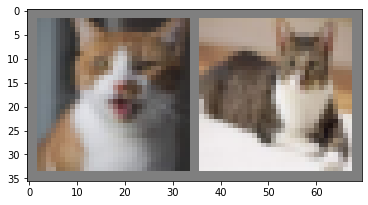

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(2)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(2)))

Predicted:    cat   cat
